

# Power Production Project for *Fundamentals of Data Analysis* at GMIT
by Radek Wojtczak G00352936<br>


**Instructions:**

>In this project you must perform and explain simple linear regression using Python
on the powerproduction dataset. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.
Your submission must be in the form of a git repository containing, at a minimum, the
following items:
>1. Jupyter notebook that performs simple linear regression on the data set.
>2. In that notebook, an explanation of your regression and an analysis of its accuracy.
>3. Standard items in a git repository such as a README.

>To enhance your submission, you might consider comparing simple linear regression to
other types of regression on this data set.


# Wind power



**How does a wind turbine work?**

Wind turbines can turn the power of wind into the electricity we all use to power our homes and businesses. They can be stand-alone, supplying just one or a very small number of homes or businesses, or they can be clustered to form part of a wind farm. 

The visible parts of the wind farm that we’re all used to seeing – those towering white or pale grey turbines. Each of these turbines consists of a set of blades, a box beside them called a nacelle and a shaft. The wind – and this can be just a gentle breeze – makes the blades spin, creating kinetic energy. The blades rotating in this way then also make the shaft in the nacelle turn and a generator in the nacelle converts this kinetic energy into electrical energy.

![How it works](img/works.jpg) 

**What happens to the wind-turbine generated electricity next?**

To connect to the national grid, the electrical energy is then passed through a transformer on the site that increases the voltage to that used by the national electricity system. It’s at this stage that the electricity usually moves onto the National Grid transmission network, ready to then be passed on so that, eventually, it can be used in homes and businesses. Alternatively, a wind farm or a single wind turbine can generate electricity that is used privately by an individual or small set of homes or businesses.
 

**How strong does the wind need to be for a wind turbine to work?**

Wind turbines can operate in anything from very light to very strong wind speeds. They generate around 80% of the time, but not always at full capacity. In really high winds they shut down to prevent damage.

![Frequency](img/freq.png)

**Where are wind farms located?**

Wind farms tend to be located in the windiest places possible, to maximise the energy they can create – this is why you’ll be more likely to see them on hillsides or at the coast. Wind farms that are in the sea are called offshore wind farms, whereas those on dry land are termed onshore wind farms.

**Wind energy in Ireland**

Wind energy is currently the largest contributing resource of renewable energy in Ireland. It is both Ireland’s largest and cheapest renewable electricity resource. In 2018 Wind provided 85% of Ireland’s renewable electricity and 30% of our total electricity demand. It is the second greatest source of electricity generation in Ireland after natural gas. Ireland is one of the leading countries in its use of wind energy and 3rd place worldwide in 2018, after Denmark and Uruguay.

![Windfarms in Ireland](img/map.jpg)

### Exploring dataset:

In [1]:
# importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns 
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot

In [2]:
# loading our dataset, seting columns names and changing index to start from 1 instead of 0
df = pd.read_csv('dataset/powerproduction.txt', sep=",", header=None)
df.columns = ["speed", "power"]
df = df[1:]
df

,speed,power
1,0.000,0.000
2,0.125,0.000
3,0.150,0.000
4,0.225,0.000
5,0.275,0.000
...,...,...
496,24.775,0.000
497,24.850,0.000
498,24.875,0.000
499,24.950,0.000


In [3]:
# checking for nan values
count_nan = len(df) - df.count()
count_nan

speed    0
power    0
dtype: int64

In [4]:
# Converting Strings to Floats
df = df.astype(float)

In [5]:
# showing first 20 results
df.head(20)

,speed,power
1,0.000,0.000
2,0.125,0.000
3,0.150,0.000
4,0.225,0.000
5,0.275,0.000
6,0.325,4.331
7,0.400,5.186
8,0.450,3.826
9,0.501,1.048
10,0.526,5.553


In [6]:
# basic statistic of speed column
df['speed'].describe()

count    500.000000
mean      12.590398
std        7.224991
min        0.000000
25%        6.324750
50%       12.550500
75%       18.775250
max       25.000000
Name: speed, dtype: float64

In [7]:
# basic statistic of power column
df['power'].describe()

count    500.000000
mean      48.014584
std       41.614572
min        0.000000
25%        5.288000
50%       41.645500
75%       93.537000
max      113.556000
Name: power, dtype: float64

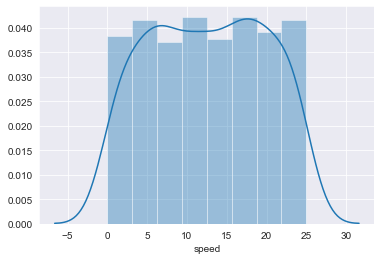

In [8]:
# histogram of 'speed' data
sns.set_style('darkgrid')
sns.distplot(df['speed'])
plt.show()

We can clearly see normal distribution in above 'speed' column data.

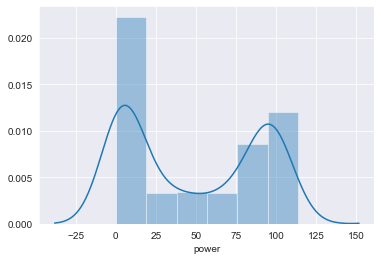

In [9]:
# histogram od 'power' data
sns.set_style('darkgrid')
sns.distplot(df['power'])
plt.show()

As we can see above this distribution look like bimodal distribution.

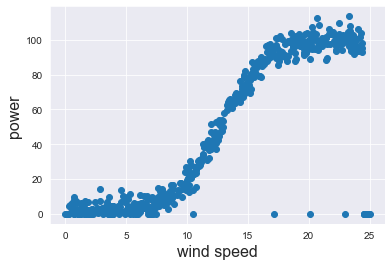

In [10]:
# scatter plot of our dataset
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(df['speed'],df['power'])
plt.show()

In [11]:
df

,speed,power
1,0.000,0.0
2,0.125,0.0
3,0.150,0.0
4,0.225,0.0
5,0.275,0.0
...,...,...
496,24.775,0.0
497,24.850,0.0
498,24.875,0.0
499,24.950,0.0


## Regression

Regression analysis is a set of statistical methods used for the estimation of relationships between a dependent variable and one or more independent variables. It can be utilized to assess the strength of the relationship between variables and for modeling the future relationship between them.


The term regression is used when you try to find the relationship between variables.

In Machine Learning, and in statistical modeling, that relationship is used to predict the outcome of future events.

## Linear Regression

The term “linearity” in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.

Simple linear regression is useful for finding relationship between two continuous variables. One is predictor or independent variable and other is response or dependent variable. It looks for statistical relationship but not deterministic relationship. Relationship between two variables is said to be deterministic if one variable can be accurately expressed by the other. For example, using temperature in degree Celsius it is possible to accurately predict Fahrenheit. Statistical relationship is not accurate in determining relationship between two variables. For example, relationship between height and weight.
The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line.

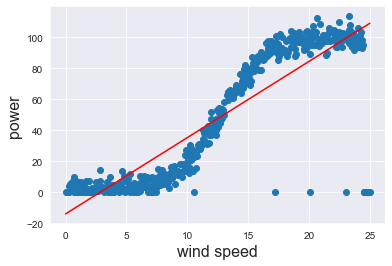

In [12]:
# divide data to x = speed and y = power
x = df['speed']
y = df['power']

# model of Linear regression
model = LinearRegression(fit_intercept=True)

# fiting the model
model.fit(x[:, np.newaxis], y)

# making predyctions
xfit = np.linspace(0, 25, 100)
yfit = model.predict(xfit[:, np.newaxis])

# creating plot
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x, y)
plt.plot(xfit, yfit, color="red");

In [13]:
# slope and intercept parameters
print("Parameters:", model.coef_, model.intercept_)
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Parameters: [4.91759567] -13.899902630519634
Model slope:     4.9175956654046695
Model intercept: -13.899902630519634


**Different approach: Simple linear regression model**

Fiting line helps to determine, if our model is predicting well on test dataset.
With help of a line we can calculate the error of each datapoint from a line on basis of how fare it is from the line.
Error could be +ve or -ve, and on basis of that we can calculate the cost function.
I have used Fitted Line Plot to display the relationship between one continuous predictor and a response. A fitted line plot shows a scatterplot of the data with a regression line representing the regression equation.

A best fitted line can be roughly determined using an eyeball method by drawing a straight line on a scatter plot so that the number of points above the line and below the line is about equal (and the line passes through as many points as possible).As we can see below our data,are a little bit sinusoidal and in this case best fitted line is trying to cover most of points that are on diagonal, but also it has to cover other data points so its little bit tweaked due to overestimation and underestimation.

I divided data into training and testing samples at ratio of 70-30%. After that I will apply different models to compare the accuracy scores of all models.

In [14]:
# training our main model
x_train,x_test,y_train,y_test = train_test_split(df[['speed']],df.power,test_size = 0.3)

Simple linear regression model

In [15]:
reg_simple = lm.LinearRegression()
reg_simple.fit(x_train,y_train)

LinearRegression()

Best fit line on test dataset with simple linear regression

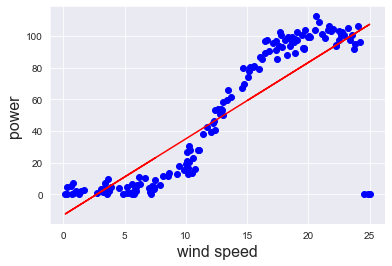

In [16]:
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,reg_simple.predict(x_test),color = 'r')
plt.show()

Slope, y-intercept and score of our predictions.

In [17]:
reg_simple.coef_ #slope

array([4.81672245])

In [18]:
reg_simple.intercept_ #y-intercept

-13.12585165142493

In [19]:
reg_simple.score(x_test,y_test)

0.7500145176254372

## Ridge regression and classification

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. When
multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from
the true value. By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors.
It is hoped that the net effect will be to give estimates that are more reliable

In [20]:
reg_ridge = lm.Ridge(alpha=.5)
reg_ridge.fit(x_train,y_train)

Ridge(alpha=0.5)

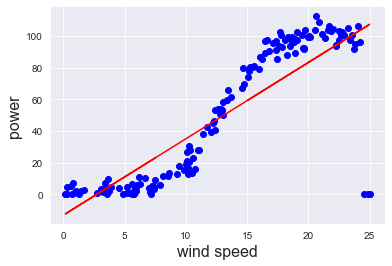

In [21]:
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,reg_ridge.predict(x_test),color = 'r')
plt.show()

Slope, y-intercept and score of our predictions.

In [22]:
reg_ridge.coef_ #slope

array([4.81659234])

In [23]:
reg_ridge.intercept_ #y-intercept

-13.12422945970269

In [24]:
reg_ridge.score(x_test,y_test)

0.7500119065722066

**With regularization parameter.**

In [25]:
reg_ridgecv = lm.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg_ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))

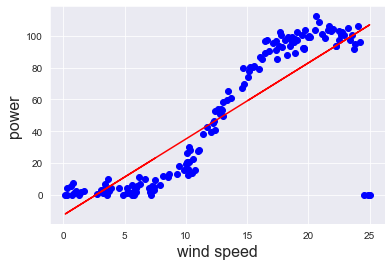

In [26]:
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,reg_ridgecv.predict(x_test),color = 'r')
plt.show()

Slope, y-intercept and score of our predictions.

In [27]:
reg_ridgecv.coef_ #slope

array([4.79083984])

In [28]:
reg_ridgecv.intercept_ #y-intercept

-12.803147956241773

In [29]:
reg_ridgecv.score(x_test,y_test)

0.7494761152188576

# Lasso

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

The acronym “LASSO” stands for Least Absolute Shrinkage and Selection Operator.

In [30]:
reg_lasso = lm.Lasso(alpha=0.1)
reg_lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

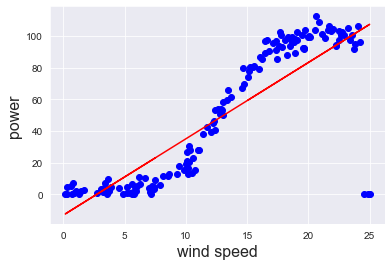

In [31]:
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,reg_lasso.predict(x_test),color = 'r')
plt.show()

Slope, y-intercept and score of our predictions.

In [32]:
reg_lasso.coef_ #slope

array([4.81483157])

In [33]:
reg_lasso.intercept_ #y-intercept

-13.102276183022624

In [34]:
reg_lasso.score(x_test,y_test)

0.7499764761122948

# LARS Lasso

In statistics, least-angle regression (LARS) is an algorithm for fitting linear regression models to high-dimensional data, developed by Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani.[1]

Suppose we expect a response variable to be determined by a linear combination of a subset of potential covariates. Then the LARS algorithm provides a means of producing an estimate of which variables to include, as well as their coefficients.

Instead of giving a vector result, the LARS solution consists of a curve denoting the solution for each value of the L1 norm of the parameter vector. The algorithm is similar to forward stepwise regression, but instead of including variables at each step, the estimated parameters are increased in a direction equiangular to each one's correlations with the residual.

In [35]:
reg_lars = lm.Lars(n_nonzero_coefs=1)
reg_lars.fit(x_train,y_train)

Lars(n_nonzero_coefs=1)

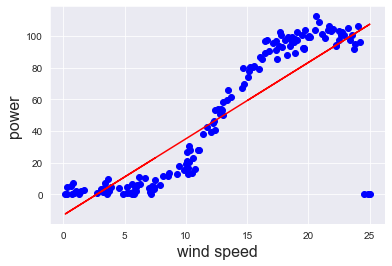

In [36]:
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,reg_lars.predict(x_test),color = 'r')
plt.show()

Slope, y-intercept and score of our predictions.

In [37]:
reg_lars.coef_ #slope

array([4.81672245])

In [38]:
reg_lars.intercept_ #y-intercept

-13.125851651424945

In [39]:
reg_lars.score(x_test,y_test)

0.7500145176254372

**Accuracy** of all models are almost 78% and model having accuracy between 70% to 80% are considered as a good models.<br>
If score value is between 80% and 90%, then model is cosidered as excellent model. If score value is between 90% and 100%, it's a probably an overfitting case.

<img src="img/img2.png">


Above image explains over and under **estimation** of data, We can see in below image that how 
datapoints are overestimating and underestimating at some points



<img src="img/img_exp.png">



## Logistic Regression

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.

**Linear Regression Vs. Logistic Regression**

Linear regression gives you a continuous output, but logistic regression provides a constant output. An example of the continuous output is house price and stock price. Example's of the discrete output is predicting whether a patient has cancer or not, predicting whether the customer will churn. Linear regression is estimated using Ordinary Least Squares (OLS) while logistic regression is estimated using Maximum Likelihood Estimation (MLE) approach.

<img src="img/linlog.png">


In [40]:
# Logistic regression model
logistic_regression = LogisticRegression(max_iter=5000)

In [41]:
# importing necessary packages
from sklearn import preprocessing
from sklearn import utils

# encoding data to be able to proceed with Logistic regression
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)
print(y_train_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(y_train_encoded))

[ 34 214 180 266  37  13 154   0 129 122 135 159 170  29 182 166 307  30
 279 234 173 230   0 272 296 247  54 112 134   0  15   0 205 158 186  67
  28 227 194 165 261 216  66 250 190 181 153   1  12  78   0 209  83  31
 235 300 264  79 285   0  55 218 178   0 174 199 302   0 210 151 281 231
 308   7   4  19 232 176 211  24 220 304   5  85 267 115 223 228  44 240
 280 188   0 282  95 219  63 126 161 257  70 207 123   0 179 147 293 236
 198  11   0  59 145  49 277 294 130   0 283  33  16  56 224  73   0 144
  62 102 148 133 118  61 150   0   0 260  90  71   0 155  88   0 288 259
 121 192  20 312 201 193   0 106 284 204   9 242 105  99  46   0  77   3
  39  45 163 213 306 185  75 117  76 286  42 255   0   8  68 295 140  36
 275 226 197  35   0 196 132  10 100 120 175  65 305 111 229 141  69 289
 263 172   0 271   0  17  97 103 220   0 258 160 303 127 222 274  91 290
 238 200  23  14   2  93   0 128  72  84  27   6 162 276 212 183 278 244
 268 237 125 136 156 142 221   0  38   0 177 298 18

In [42]:
# training model
logistic_regression.fit(x_train, y_train_encoded)

LogisticRegression(max_iter=5000)

In [43]:
logistic_regression.fit(x_train, y_train_encoded)

LogisticRegression(max_iter=5000)

In [44]:
# predicting "y"
y_pred = logistic_regression.predict(x_test)

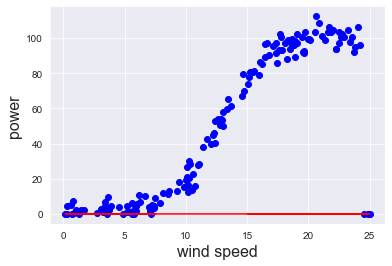

In [45]:
# creating plot
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,logistic_regression.predict_proba(x_test)[:,1],color = 'r')
plt.show()


Slope, y-intercept and score of our predictions.

In [46]:
logistic_regression.coef_.mean() #slope

2.3535536317145097e-12

In [47]:
logistic_regression.intercept_ .mean()#y-intercept

-1.4637634377575482e-13

In [48]:
test_enc = preprocessing.LabelEncoder()
y_test_encoded = test_enc.fit_transform(y_test)
logistic_regression.score(x_test,y_test_encoded)

0.06

In [49]:
# trying to get rid of outliers
filter = df["power"]==0.0
filter

1      True
2      True
3      True
4      True
5      True
       ... 
496    True
497    True
498    True
499    True
500    True
Name: power, Length: 500, dtype: bool

In [50]:
# using enumerate() + list comprehension 
# to return true indices. 
res = [i for i, val in enumerate(filter) if val] 
  
# printing result 
print ("The list indices having True values are : " +  str(res))

The list indices having True values are : [0, 1, 2, 3, 4, 15, 16, 24, 26, 31, 35, 37, 39, 42, 43, 44, 47, 60, 65, 67, 70, 73, 74, 75, 83, 89, 105, 110, 111, 114, 133, 135, 136, 140, 149, 208, 340, 404, 456, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]


In [51]:
# updating list by dropping "0" power not including first few data points
update = df.drop(df.index[[15, 16, 24, 26, 31, 35, 37, 39, 42, 43, 44, 47, 60, 65, 67, 70, 73, 74, 75, 83, 89, 105, 110, 111, 114, 133, 135, 136, 140, 149, 208, 340, 404, 456, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]])
update

,speed,power
1,0.000,0.000
2,0.125,0.000
3,0.150,0.000
4,0.225,0.000
5,0.275,0.000
...,...,...
486,24.249,103.700
487,24.299,93.694
488,24.349,93.078
489,24.374,98.223


In [52]:
# training updated data
x_train,x_test,y_train,y_test = train_test_split(update[['speed']],update.power,test_size = 0.3)

In [53]:
# updated model
log = LogisticRegression(max_iter=5000)

In [54]:
# encoding data again
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)
print(y_train_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(y_train_encoded))

[ 21 109   0  15 242 273 270  14 159 182 222 300 101 239  35  90  44  59
 279 205 148 120 291  57  31 100 232  89  93 196  54 255 151 253 283 281
 301 206 207  65 267  40 251 167 268 229  18  37  91 231 302 312 104 307
 256   1 209  23 257  39  82  25 203 246 284  41  71  85 311  88 228   7
  95 252  69 122  58  72 265 140 240  10  19  52  63 230 169  80  16 123
 136 224 247 126 124 142  68 262  11 288 287 106 147  12 105 204  29  94
  49 133 315 194  20 263 166  30 294 111 113 245 295 138  61 187 211 195
 218 115  75 103 223 158 234  42 241 198  76  97 172 236 248   0 160 185
  53  98  83 276  77 292 130 299 153 178  48 173 293 137 296 314 298 141
 144  43  60 112  38 174 162 210 217 175  32 129 235  86 221  51 108  26
  45  47  70 303 155 250  28 259 277 308  24 186 170  96 192 254 107 208
   0 128  55 216 146  73 225   9   3  99 226 102 180  22 285  87 305 164
 290  27 119  36 227 199 154  67 238  56 289 280  92 304  50 157 168  78
 156 260   8 243 297 116  46 202 212   2 237 125 15

In [55]:
# fitting data
log.fit(x_train, y_train_encoded)

LogisticRegression(max_iter=5000)

In [56]:
"predicting "y"
y_pred = log.predict_proba(x_test)[:,1]

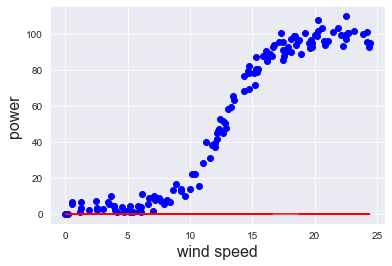

In [57]:
# creating plot
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,log.predict_proba(x_test)[:,300],color = 'r')
plt.show()

**Logistic regression** is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

It was very bad on our data with score below 0.05, even when I have tried to cut outliners.

## Polynomial regression 

is a special case of linear regression where we fit a polynomial equation on the data with a curvilinear relationship between the target variable and the independent variables.

In a curvilinear relationship, the value of the target variable changes in a non-uniform manner with respect to the predictor (s).

The number of higher-order terms increases with the increasing value of n, and hence the equation becomes more complicated.

While there might be a temptation to fit a higher degree polynomial to get lower error, this can result in over-fitting. Always plot the relationships to see the fit and focus on making sure that the curve fits the nature of the problem. Here is an example of how plotting can help:

<img src="img/fitting.png">

Especially look out for curve towards the ends and see whether those shapes and trends make sense. Higher polynomials can end up producing wierd results on extrapolation.

In [58]:
# Training Polynomial Regression Model
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(x_poly, y_train)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_train)

LinearRegression()

In [59]:
# Predict Result with Polynomial Regression
poly = lin_reg.predict(poly_reg.fit_transform(x_test))
poly

array([ 83.91327612,  48.18902691,  95.00057897,  -0.91066685,
        20.11364435,  97.55324958,   0.58709037,  71.3995203 ,
       103.06878903,  12.1400417 , 103.9833392 , 105.49898144,
         7.1189337 ,   7.16500063,  44.05776311,   7.47485148,
        22.30121185,  -0.88996151,   8.74207464,  -0.4779588 ,
       103.46150305,  72.75056341,  10.16615845, 103.17309856,
       105.12332264,  67.98178211,  31.58299112,  89.33274958,
        13.02906931,  68.2111958 ,   3.23743395,  94.13862406,
        15.85166778, 102.82376719,  80.81351033,  20.47118403,
        82.88775103,   4.33500354,  57.04373451, 100.99181873,
        89.64047936,  25.33354439,  63.81348849,  52.13034327,
        72.52610551,   3.06671079,  88.40242024,   0.64035385,
        36.48183573,  44.28502225, 104.72253236,  77.61342742,
        98.51947442,   2.73553452, 102.54694291,  91.67365425,
        11.56157231,  17.50931969,  -0.21632982,   5.03160927,
        42.92496972, 104.55117613,   2.49618437,  91.14

In [60]:
# Change into array
x = np.array(df['speed'])
y = np.array(df['power'])

In [61]:
# Changing the shape of array
x = x.reshape(-1,1)
y = y.reshape(-1,1)

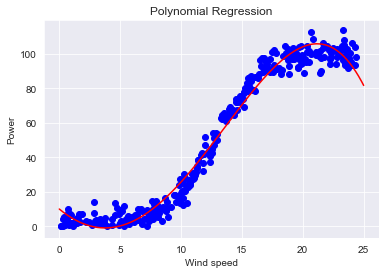

In [62]:
# Visualise the Results of Polynomial Regression
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x, lin_reg.predict(poly_reg.fit_transform(x)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Wind speed')
plt.ylabel('Power')
plt.show()

Slope, y-intercept and score of our predictions.

In [63]:
lin_reg.coef_.mean() #slope

-1.0095209396672558

In [64]:
lin_reg.intercept_#y-intercept

10.011067507759364

In [65]:
model.score(x_test, y_test) #score

0.8717545922383143

## Spearman’s Rank Correlation

This statistical method quantifies the degree to which ranked variables are associated by a monotonic function, meaning an increasing or decreasing relationship. As a statistical hypothesis test, the method assumes that the samples are uncorrelated (fail to reject H0).

>The Spearman rank-order correlation is a statistical procedure that is designed to measure the relationship between two variables on an ordinal scale of measurement.

>— Nonparametric Statistics for Non-Statisticians: A Step-by-Step Approach, 2009.

The intuition for the Spearman’s rank correlation is that it calculates a Pearson’s correlation (e.g. a parametric measure of correlation) using the rank values instead of the real values. Where the Pearson’s correlation is the calculation of the covariance (or expected difference of observations from the mean) between the two variables normalized by the variance or spread of both variables.

Spearman’s rank correlation can be calculated in Python using the spearmanr() SciPy function.

The function takes two real-valued samples as arguments and returns both the correlation coefficient in the range between -1 and 1 and the p-value for interpreting the significance of the coefficient.

In [66]:
# importing sperman correlation
from scipy.stats import spearmanr

# prepare data
x = df['speed']
y = df['power']
# calculate spearman's correlation
coef, p = spearmanr(x, y)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.819
Samples are correlated (reject H0) p=0.000


The statistical test reports a strong positive correlation with a value of 0.819. The p-value is close to zero, which means that the likelihood of observing the data given that the samples are uncorrelated is very unlikely (e.g. 95% confidence) and that we can reject the null hypothesis that the samples are uncorrelated.

## Kendall’s Rank Correlation

The intuition for the test is that it calculates a normalized score for the number of matching or concordant rankings between the two samples. As such, the test is also referred to as Kendall’s concordance test.

The Kendall’s rank correlation coefficient can be calculated in Python using the kendalltau() SciPy function. The test takes the two data samples as arguments and returns the correlation coefficient and the p-value. As a statistical hypothesis test, the method assumes (H0) that there is no association between the two samples.


In [67]:
# importing kendall correaltion
from scipy.stats import kendalltau

# calculate kendall's correlation
coef, p = kendalltau(x, y)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Kendall correlation coefficient: 0.728
Samples are correlated (reject H0) p=0.000


Running the example calculates the Kendall’s correlation coefficient as 0.728, which is highly correlated.

The p-value is close to zero (and printed as zero), as with the Spearman’s test, meaning that we can confidently reject the null hypothesis that the samples are uncorrelated.

## Conclusion 

Spearman’s & Kendall’s Rank Correlation shows us that our data are strongly correlated. After trying Linear, Ridge, Lasso and LARS Lasso regressions all of them are equally effective, so the best choice would be to stick with Linear Regression to simplify.

As I wanted to find the better way I tried Logistic regression and I found out it is pretty useless for our dataset even when I get rid of outliers.

Next in line was Polynomial regression and it was great success with nearly 90% score. Seeing results best approach for our dataset would Polynomial regression with Linear regression for our second choice if we would like to keep it simple.


**References:**

- https://www.goodenergy.co.uk/media/1775/howawindturbineworks.jpg?width=640&height=&center=0.5,0.5&mode=crop

- https://www.nationalgrid.com/stories/energy-explained/how-does-wind-turbine-work

- https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn

- https://www.seai.ie/technologies/wind-energy/

- https://towardsdatascience.com/ridge-regression-python-example-f015345d936b

- https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

- https://realpython.com/linear-regression-in-python/

- https://en.wikipedia.org/wiki/Least-angle_regression

- https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

- https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

- https://www.statisticshowto.com/lasso-regression/

- https://saskeli.github.io/data-analysis-with-python-summer-2019/linear_regression.html

- https://www.w3schools.com/python/python_ml_linear_regression.asp

- https://www.geeksforgeeks.org/linear-regression-python-implementation/

- https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html

- https://towardsdatascience.com/an-introduction-to-linear-regression-for-data-science-9056bbcdf675

- https://www.kaggle.com/ankitjha/comparing-regression-models

- https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

- https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

- https://www.researchgate.net/post/Is_there_a_test_which_can_compare_which_of_two_regression_models_is_best_explains_more_variance

- https://heartbeat.fritz.ai/logistic-regression-in-python-using-scikit-learn-d34e882eebb1

- https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/

- https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

- https://www.w3schools.com/python/python_ml_polynomial_regression.asp

- https://www.dailysmarty.com/posts/polynomial-regression

- https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/

- https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/